<a href="https://colab.research.google.com/github/PhDSGilber/Tradicional-NLP/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

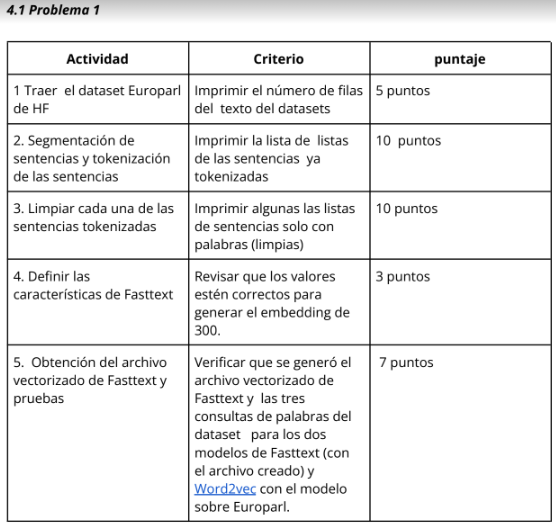

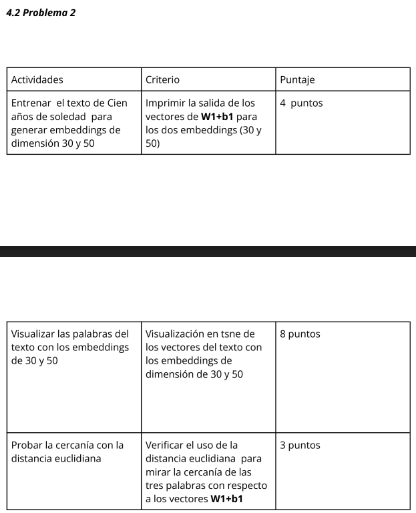

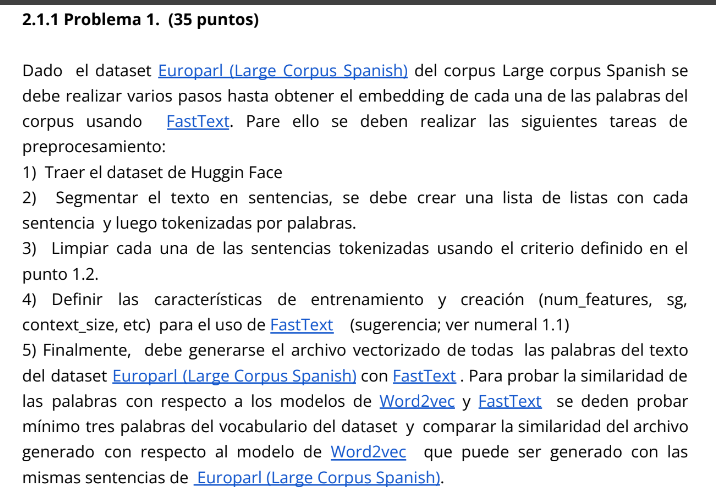

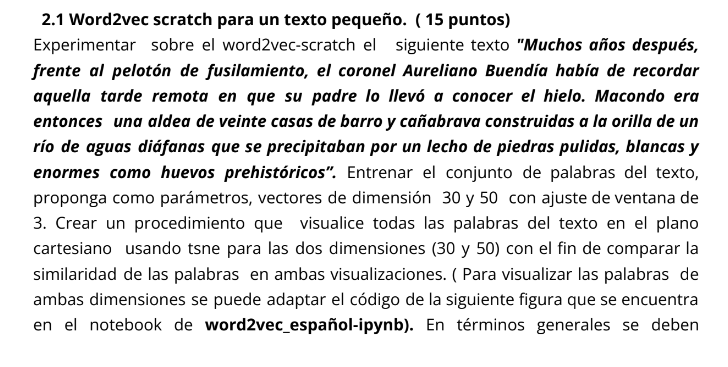

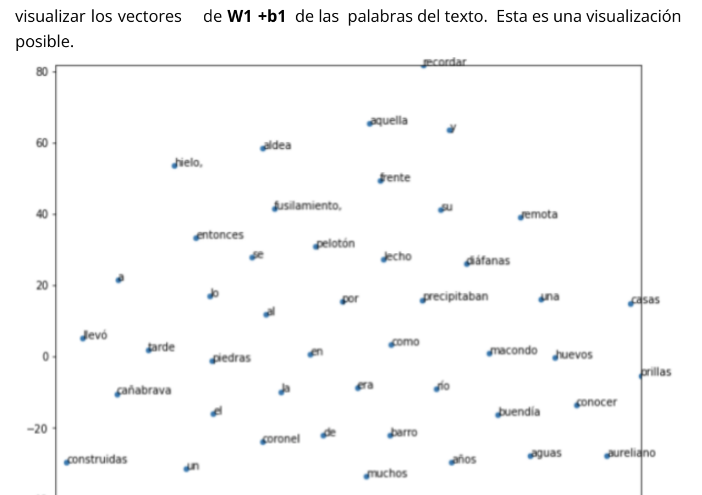![image.png](
  
)

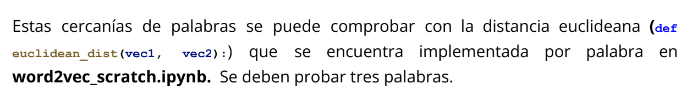

# **NATURAL LANGUAGE PROCESSING**

# **Requirements and libraries**

In [1]:
!pip install datasets
!pip install -U spacy
!python -m spacy download es_core_news_sm
!pip install stanza
!pip install transformers
!pip install genesim
!wget http://lvdmaaten.github.io/tsne/code/tsne_python.zip
!unzip '/content/tsne_python.zip'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-10-

In [2]:
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.tokenize import (TreebankWordTokenizer,
                          word_tokenize,
                          wordpunct_tokenize,
                          TweetTokenizer,
                          MWETokenizer)
from nltk.corpus import stopwords
import spacy
import stanza
from transformers import BertTokenizer,XLMRobertaTokenizer,CamembertTokenizer
import re
import string
from gensim.models import FastText
from gensim.models import Word2Vec
import multiprocessing
from matplotlib import pyplot as plt
import numpy as np
import math
from tsne_python import tsne

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **European Parliament Proceedings Parallel Corpus Dataset**
---

A corpus of parallel text in 21 European languages from the proceedings of the European Parliament.

The Europarl parallel corpus is extracted from the proceedings of the European Parliament (1996-2011). It includes versions in 21 European languages: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek. Parallel sentence counts are in the range 400K-2M, depending on the language combination.

The goal of the extraction and processing was to generate sentence aligned text for statistical machine translation systems. For this purpose we extracted matching items and labeled them with corresponding document IDs. Using a preprocessor we identified sentence boundaries. We sentence aligned the data using a tool based on the Church and Gale algorithm.

The Europarl corpus was collected mainly to aid research in statistical machine translation (training, evaluation), but it has been used for many other natural language problems: word sense disambiguation, anaphora resolution, information extraction, etc.

Monolingual datasets are also available for 9 languages. These are supersets of the parallel versions. Monolingual word counts are in the range 7M-54M, depending on the language.

Reference: [European Parliament Proceedings Parallel Corpus 1996-2011](https://www.statmt.org/europarl/)

In [3]:
#4.1 Dataset import and check rows
dataset = load_dataset('large_spanish_corpus','Europarl')
print('The number of rows for dataset Europarl-Spanish is: ',dataset["train"].num_rows)

Generating train split:   0%|          | 0/2174141 [00:00<?, ? examples/s]

The number of rows for dataset Europarl-Spanish is:  2174141


In [ ]:
#4.1.2 convert datasets to list of lists and tokenize by words

#convert list to list
train_dataset = dataset["train"]
list_of_list_dataset = []

for example in train_dataset:
    text = [example['text']]
    list_of_list_dataset.append(text)

#tokenize by words


#use spicy and "es_core_news_sm"
nlp_spacy = spacy.load("es_core_news_sm")
dataset_token_spicy = []
for row_dataset in list_of_list_dataset[0:3]:
  doc = nlp_spacy(row_dataset[0])
  accu = []
  for token in doc:
    accu.append(token.text)
  dataset_token_spicy.append(accu)


#use nltk and "TreebankWordTokenizer"
dataset_token_treebank = []
toke_treebank = TreebankWordTokenizer()

for row_dataset in list_of_list_dataset[0:3]:

  dataset_token_treebank.append(toke_treebank.tokenize(row_dataset[0]))


#use nltk and "MWETokenizer"
dataset_token_MWETokenizer = []
toke_MWETokenizer = MWETokenizer()

for row_dataset in list_of_list_dataset[0:3]:

  dataset_token_MWETokenizer.append(toke_MWETokenizer.tokenize(word_tokenize(row_dataset[0])))


#use nltk and "word_tokenizer"
dataset_token_word_tokenizer = []

for row_dataset in list_of_list_dataset[:]:

  dataset_token_word_tokenizer.append(word_tokenize(row_dataset[0]))


#use nltk and "wordpunct_tokenizer"
dataset_token_wordpunct_tokenizer = []
for row_dataset in list_of_list_dataset[0:3]:

  dataset_token_wordpunct_tokenizer.append(wordpunct_tokenize(row_dataset[0]))


#use stanza
nlp_stanza = stanza.Pipeline(lang='es', processors='tokenize')
dataset_token_stanza = []
for row_dataset in list_of_list_dataset[0:3]:
  doc = nlp_stanza(row_dataset[0])
  accu = []
  for sentence in doc.sentences:
    for token in sentence.tokens:
      accu.append(token.text)
  dataset_token_stanza.append(accu)


#use a simple split
dataset_token_split = []

for row_dataset in list_of_list_dataset[0:3]:

  dataset_token_split.append(row_dataset[0].split())


#use transformers options (BertTokenizer,XLMRobertaTokenizer,CamembertTokenizer)
#XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
#CamembertTokenizer.from_pretrained("camembert-base")
toke_transformer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
dataset_token_transformer = []
for row_dataset in list_of_list_dataset[0:3]:

  dataset_token_transformer.append(toke_transformer.tokenize(row_dataset[0]))

#View use pandas
dataset_select = dataset_token_word_tokenizer
max_columns = max(len(row) for row in dataset_select)
columns_name = ['Word '+str(i+1) for i in range(max_columns)]
df = pd.DataFrame(dataset_select,columns=columns_name)
df = df.fillna('--')
df

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


In [ ]:
#4.1.3 token cleaner
dataset_select_cleaner = []
stop_words = stopwords.words('spanish')
re_punc = re.compile(' [%s]' % re.escape(string.punctuation))

for sentence in dataset_select:
  new_sentence=[]
  for word in sentence:
    print(word)
    newstring = [i for i in word if not i.isdigit()]
    newstring = [re.sub (r'[0-9]','', w) for w in newstring]
    newstring = [w for w in newstring if not w in stop_words]
    newstring = [re_punc. sub('', w) for w in newstring]
    newstring = [re.sub ("\! |\' |\?|\¿|\¡\«","",w) for w in newstring]
    newstring = ''.join(newstring)
    new_sentence.append(newstring)

  dataset_select_cleaner.append(new_sentence)


#View use pandas
dataset_select = dataset_select_cleaner
max_columns = max(len(row) for row in dataset_select)
columns_name = ['Word '+str(i+1) for i in range(max_columns)]
df = pd.DataFrame(dataset_select,columns=columns_name)
df = df.fillna('--')
df

In [13]:
#4.1.4 Create and definition FastTexT
#https://arxiv.org/pdf/1607.04606.pdf
num_features = 300                        #Dimensionalidad del embeddings
min_word_count = 1                        #Umbral mínimo de recuento de palabras
num_workers = multiprocessing.cpu_count() #Número de subprocesos que se ejecutaren en paralelo
context_size = 5                          #Longitud de la ventana de contexto
seed = 1


In [ ]:
#4.1.5 Create file of FastTexT and compare with Word2Vec

"""sentences: list to train FastText
   vector_size: Size of vector for word
   window: Window to considerte number of word in left and right
   min_count: min of word repeate in corpus
   workers: numbers or kernels in CPU
   seed: seed of algorithm
   sg: 1 = Skip-gram, 0 =  CBOW (Continuous Bag of Words)"""

#fasttext
fasttext_model = FastText( sentences=dataset_select, vector_size=num_features, window=context_size, min_count=min_word_count, workers=num_workers,sg=1)
fasttext_model.wv.save_word2vec_format('./text_fasttext_skip_model' + str(num_features) + '.txt', binary=False)

#Word2Vec
Word2Vec_model = Word2Vec(sentences=dataset_select, vector_size=num_features, window=context_size, min_count=min_word_count, workers=num_workers, sg=1)
Word2Vec_model.wv.save_word2vec_format('./text_Word2Vec_skip_model' + str(num_features) + '.txt', binary=False)

#Compare two models
#USE MOST SIMILARRRRRRRRRRRRRRRRR 3 palabras
#plot 3 vectors for model fasttext vs Word2Vec
# plt.plot(fasttext_model['Cuente'][:], label = 'Cuente_fasttext')
# plt.plot(fasttext_model['Cuente'][:], label = 'Cuente_fasttext')
# plt.plot(fasttext_model['Cuente'][:], label = 'Cuente_fasttext')
# plt.plot(Word2Vec_model['machaca'][:], label = 'Cuente_Word2Vec')
# plt.plot(Word2Vec_model['machaca'][:], label = 'Cuente_Word2Vec')
# plt.plot(Word2Vec_model['machaca'][:], label = 'Cuente_Word2Vec')
# plt.legend()
# plt.show()

#Compare similarity and cosine similarity for model fasttext vs Word2Vec
word_embeddings_fasttext = {word: fasttext_model.wv[word] for word in fasttext_model.wv.index_to_key}
word_embeddings_Word2Vec = {word: Word2Vec_model.wv[word] for word in Word2Vec_model.wv.index_to_key}

sim_with_fast_word = []
simcos_with_fast_word = []

for step in range(len(word_embeddings_fasttext)):
  sim_with_fast_word.append(sim(list(word_embeddings_fasttext.values())[step],list(word_embeddings_Word2Vec.values())[step]))
  simcos_with_fast_word.append(cos(list(word_embeddings_fasttext.values())[step],list(word_embeddings_Word2Vec.values())[step]))

df = pd.DataFrame([list(word_embeddings_fasttext.keys()),sim_with_fast_word,simcos_with_fast_word]).T  # .T transpone el DataFrame para que las listas se conviertan en columnas
df.columns = columns=['Word/Token','Similarity','Cosine similarity']
df

In [ ]:
#Visualizing embeddings with t-sne
reduced_matrix_fasttext = tsne(np.array(list(word_embeddings_fasttext.values())), 2)
reduced_matrix_Word2Vec = tsne(np.array(list(word_embeddings_Word2Vec.values())), 2)

plt.figure(figsize=(12, 12), dpi=90)

plt.scatter(reduced_matrix_fasttext[:, 0], reduced_matrix_fasttext[:, 1],reduced_matrix_fasttext[:, 0].shape[0]);

for idx, word in enumerate(list(word_embeddings_fasttext.keys())):
  x = reduced_matrix_fasttext[idx, 0]
  y = reduced_matrix_fasttext[idx, 1]
  plt.annotate(word + ' Fasttext', (x,y),color='b')

plt.scatter(reduced_matrix_Word2Vec[:, 0], reduced_matrix_Word2Vec[:, 1],reduced_matrix_Word2Vec[:, 0].shape[0]);

for idx, word in enumerate(list(word_embeddings_Word2Vec.keys())):
  x = reduced_matrix_Word2Vec[idx, 0]
  y = reduced_matrix_Word2Vec[idx, 1]
  plt.annotate(word + ' Word2Vec', (x,y),color='orange')


plt.show()

In [54]:
def sim(q, d):
    a = sum(qi * di for qi, di in zip(q, d))
    b = math.sqrt(sum(qi ** 2 * di ** 2 for qi, di in zip(q, d)))
    return a / b

def cos(q, d):
    a = sum(qi * di for qi, di in zip(q, d))
    b = math.sqrt(sum(qi ** 2 for qi in q))
    c = math.sqrt(sum(di ** 2 for di in d))
    return a / (b * c)

# **Word2Vec From Scratch**
---

This is a step by step or scratch of the Word2vec algorithm, which uses a mutinomial or Softmax logistic regression model as a three-layer neural network (1 input layer, 1 hidden layer and 1 output layer) producing the vector representation of the words closest to each center word in a given vocabulary that is not annotated by hand but rather the training set is formed from the co-occurrence with a fixed and parameterizable window of the center words with their contextual words. In summary, the algorithm has three parts.


1.   Preprocessing of the training and testing sets and the matrix reduction of the input vocabulary to the embedding dimension
2.   Hidden representation of the input vectors.
3.   Obtaining the context vectors of the input vector and vector representation of the input and context vectors

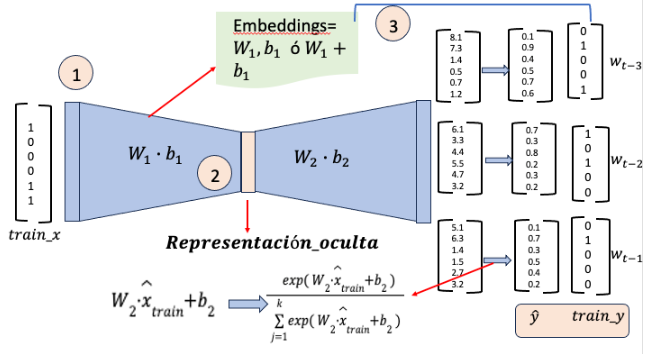

Reference: [Word2Vec_Scratch](https://github.com/sudharsan13296/Word2vec-from-scratch/blob/master/word2vec%20scratch.ipynb)

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
corpus_100_años = "Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos."

corpus_raw = corpus_100_años.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print(vocab_size)

In [ ]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    print(sentences)

In [ ]:
WINDOW_SIZE = 3

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])

In [ ]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [ ]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],data_word[1])
    #print(x_train,y_train)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#print(x_train,'parejas',y_train,'\n')
    #print(data_word[0],y_train)
# convert them to numpy arrays


print('conjunto X de entrenamiento---------')
print(x_train,y_train,'\n')
#print(x_train.shape)
#print('conjunto Y de entrenamiento---------')
#print(y_train)
#print(y_train.shape)

In [ ]:
# Se reserva el espacio para x_train y y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 50 # Este es el embeddingd de las palabras
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)
print(hidden_representation.shape)
print(b1)